In [2]:
import pandas as pd

df = pd.read_csv('dataset_malwares.csv').set_index('Name')

In [3]:
def clean_useless_cols(df, y_label):
    print('#########################')
    print(f'starting with {df.columns.size} cols')
    print('#########################')
    print(df.corr().nlargest(df.columns.size, y_label)
          [y_label].sort_values(ascending=0))
    irrelevant_cols = pd.DataFrame(df.corr()[y_label]).isna()
    ir_cols_list = irrelevant_cols[irrelevant_cols[y_label]].index
    print('\n#########################')
    print('irrelevant cols found (constants):')
    print('#########################')
    # print()
    print(df[ir_cols_list].nunique())
    df.drop(ir_cols_list, axis=1, inplace=True)
    print('\n#########################')
    print(f'voila! set cleared. {df.columns.size} cols left to work with')
    print('#########################')


clean_useless_cols(df, 'Malware')


#########################
starting with 78 cols
#########################
Malware                      1.000000
SectionMaxChar               0.393282
SizeOfStackReserve           0.251791
SuspiciousImportFunctions    0.216656
DllCharacteristics           0.197023
                               ...   
SectionMaxVirtualsize             NaN
SectionMinPhysical                NaN
SectionMinVirtual                 NaN
SectionMinPointerData             NaN
SectionMainChar                   NaN
Name: Malware, Length: 78, dtype: float64

#########################
irrelevant cols found (constants):
#########################
e_magic                  1
SectionMaxEntropy        1
SectionMaxRawsize        1
SectionMaxVirtualsize    1
SectionMinPhysical       1
SectionMinVirtual        1
SectionMinPointerData    1
SectionMainChar          1
dtype: int64

#########################
voila! set cleared. 70 cols left to work with
#########################


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(19,10),dpi=100)
cols = df.corr().nlargest(26, 'Malware')['Malware'].sort_values(ascending=0).index
sns.heatmap(df[cols].corr(),annot=True,cmap='viridis')

<Axes: >

In [60]:
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.model_selection import train_test_split

X = df.drop('Malware',axis=1)
y = df['Malware']

best_ft = SelectKBest(chi2,k=5).fit(X,y)
KX = best_ft.transform(X)
print(f'OG ft: {X.shape[1:]} | best ft: {KX.shape[1:]}')

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=101,shuffle=1,test_size=0.3,stratify=y)
# With KSelectBest
KX_train,KX_test,y_train,y_test=train_test_split(KX,y,random_state=101,shuffle=1,test_size=0.3,stratify=y)

best_ft_df = pd.DataFrame({'ft':X.columns,'score':best_ft.scores_}).sort_values('score',ascending=0)
best_ft_df

OG ft: (69,) | best ft: (5,)


ft         score
31              ImageBase  1.539519e+15
41               CheckSum  7.598350e+11
60         SectionMaxChar  3.292639e+11
59  SectionMaxPointerData  1.476704e+11
18          TimeDateStamp  7.015142e+10
..                    ...           ...
21   SizeOfOptionalHeader  2.031309e+02
17       NumberOfSections  2.026089e+02
53         SectionsLength  2.024048e+02
52  SuspiciousNameSection  1.222188e+02
54      SectionMinEntropy  1.119886e+02

[69 rows x 2 columns]

#########################
accuracy: 0.7763426240652618
#########################
#########################
accuracy: 0.7763426240652618
#########################


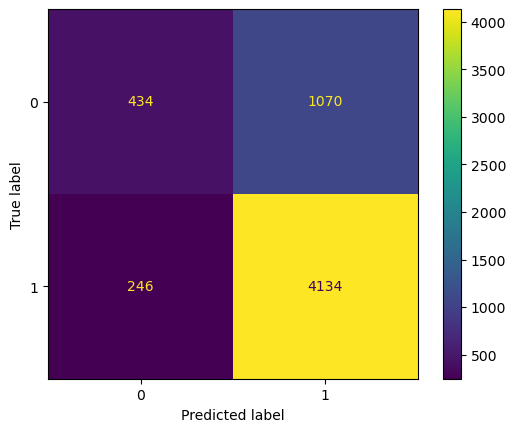

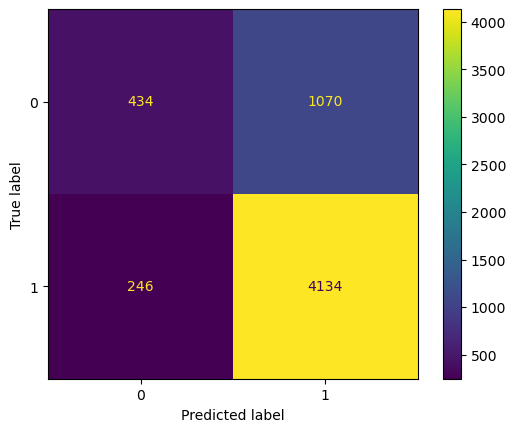

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay

def acc_confusion(clf,X,y):
    print('#########################')
    print(f'accuracy: {accuracy_score(y,clf.predict(X))}')
    print('#########################')
    ConfusionMatrixDisplay.from_estimator(clf,X,y)

# Without it
clf = LogisticRegression(random_state=101,solver='saga',tol=1)
clf.fit(X_train,y_train)
acc_confusion(clf,X_test,y_test)

# With it
clf.fit(KX_train,y_train)
acc_confusion(clf,KX_test,y_test)

In [208]:
# Imbalance
df['Malware'].value_counts()

1    14599
0     5012
Name: Malware, dtype: int64